<a href="https://colab.research.google.com/github/N-vex/Financial-Fraud/blob/main/Financial_Fraud_detection_using_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing The Dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px
import plotly.graph_objects as go
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [ ]:
# loadin the dataset to a Pandas Dataframe
bank_transaction_data = pd.read_csv('/content/bank_transactions_data_2.csv')

In [ ]:
# first 5 rows of the dataset
bank_transaction_data.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


In [ ]:
bank_transaction_data.tail()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
2507,TX002508,AC00297,856.21,2023-04-26 17:09:36,Credit,Colorado Springs,D000625,21.157.41.17,M072,Branch,33,Doctor,109,1,12690.79,2024-11-04 08:11:29
2508,TX002509,AC00322,251.54,2023-03-22 17:36:48,Debit,Tucson,D000410,49.174.157.140,M029,Branch,48,Doctor,177,1,254.75,2024-11-04 08:11:42
2509,TX002510,AC00095,28.63,2023-08-21 17:08:50,Debit,San Diego,D000095,58.1.27.124,M087,Branch,56,Retired,146,1,3382.91,2024-11-04 08:08:39
2510,TX002511,AC00118,185.97,2023-02-24 16:24:46,Debit,Denver,D000634,21.190.11.223,M041,Online,23,Student,19,1,1776.91,2024-11-04 08:12:22
2511,TX002512,AC00009,243.08,2023-02-14 16:21:23,Credit,Jacksonville,D000215,59.127.135.25,M041,Online,24,Student,93,1,131.25,2024-11-04 08:07:49


In [ ]:
# dataset information
bank_transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

In [15]:
bank_transaction_data.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000
mean,297.593778,44.673965,119.643312,1.124602,5114.302966
std,291.946243,17.792198,69.963757,0.602662,3900.942499
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.885000,27.000000,63.000000,1.000000,1504.370000
50%,211.140000,45.000000,112.500000,1.000000,4735.510000
75%,414.527500,59.000000,161.000000,1.000000,7678.820000
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


In [ ]:
# checking the numberr of missing values in each colums
bank_transaction_data.isnull().sum()

,0
TransactionID,0
AccountID,0
TransactionAmount,0
TransactionDate,0
TransactionType,0
Location,0
DeviceID,0
IP Address,0
MerchantID,0
Channel,0


In [ ]:
# the distribution of legit transaction and fraudlent transaction
bank_transaction_data['TransactionDuration'].value_counts()

,count
TransactionDuration,
63,26
109,21
31,21
105,20
146,20
...,...
271,1
267,1
249,1


In [16]:
bank_transaction_data['TransactionDate'] = pd.to_datetime(bank_transaction_data['TransactionDate'])
bank_transaction_data['TransactionDate'].dtypes
bank_transaction_data['PreviousTransactionDate'] = pd.to_datetime(bank_transaction_data['PreviousTransactionDate'])
bank_transaction_data['PreviousTransactionDate'].dtypes

dtype('<M8[ns]')

In [17]:
bank_transaction_data.duplicated().sum()

0

In [18]:
bank_transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   TransactionID            2512 non-null   object        
 1   AccountID                2512 non-null   object        
 2   TransactionAmount        2512 non-null   float64       
 3   TransactionDate          2512 non-null   datetime64[ns]
 4   TransactionType          2512 non-null   object        
 5   Location                 2512 non-null   object        
 6   DeviceID                 2512 non-null   object        
 7   IP Address               2512 non-null   object        
 8   MerchantID               2512 non-null   object        
 9   Channel                  2512 non-null   object        
 10  CustomerAge              2512 non-null   int64         
 11  CustomerOccupation       2512 non-null   object        
 12  TransactionDuration      2512 non-

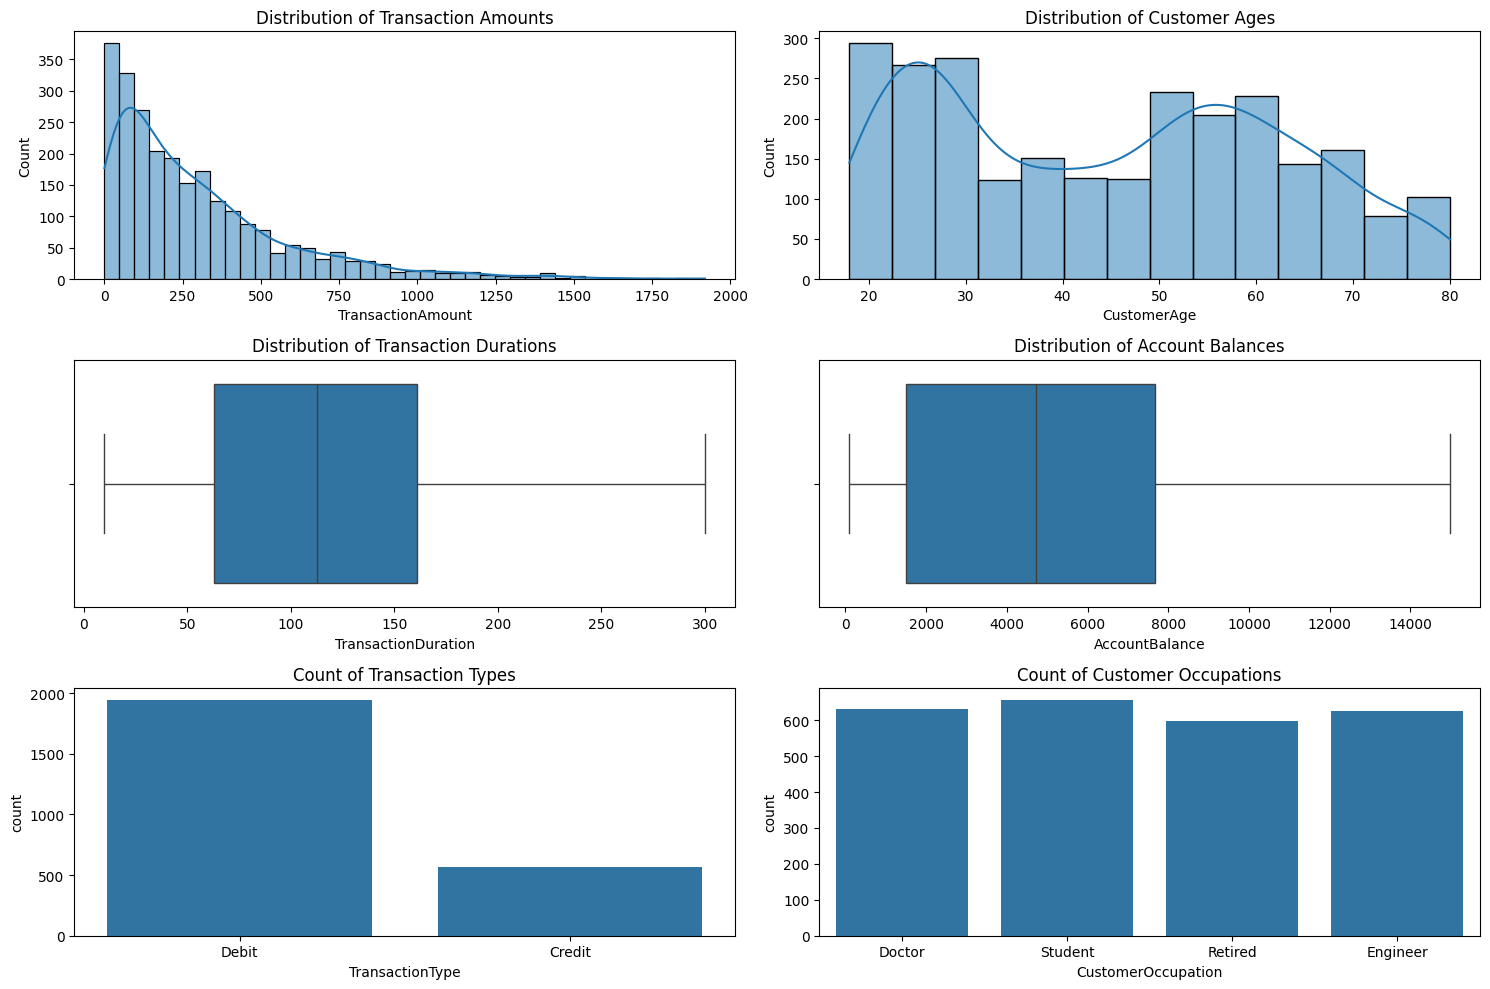

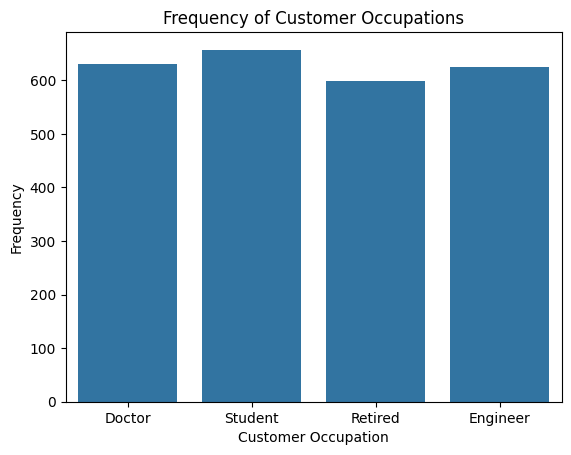

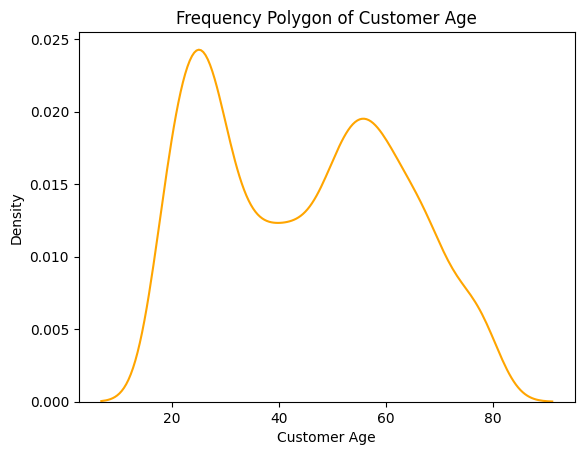

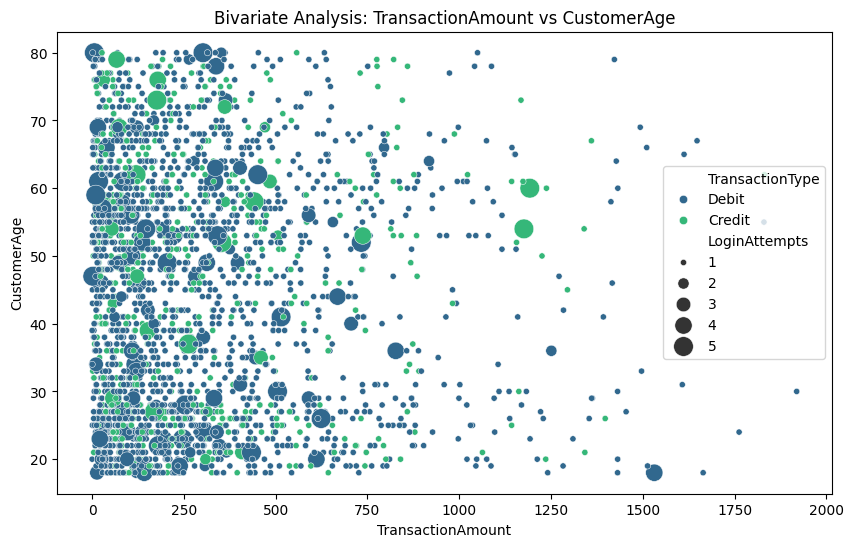

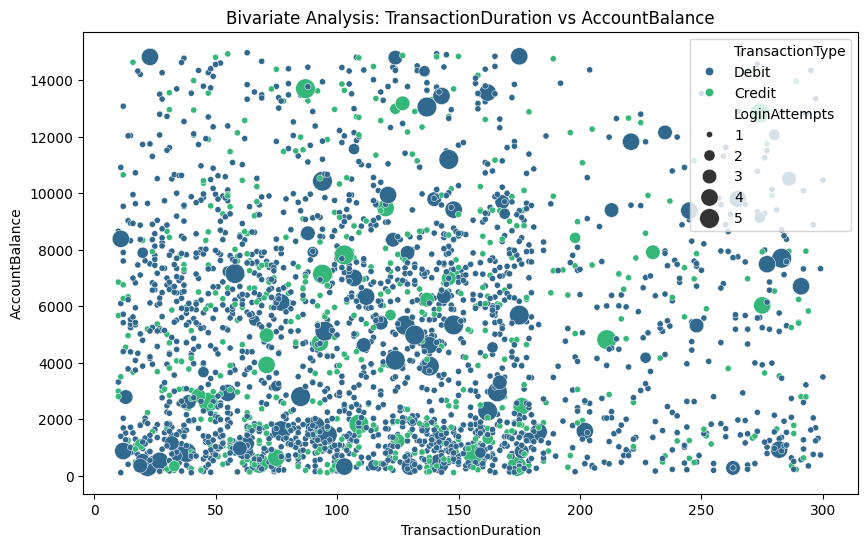

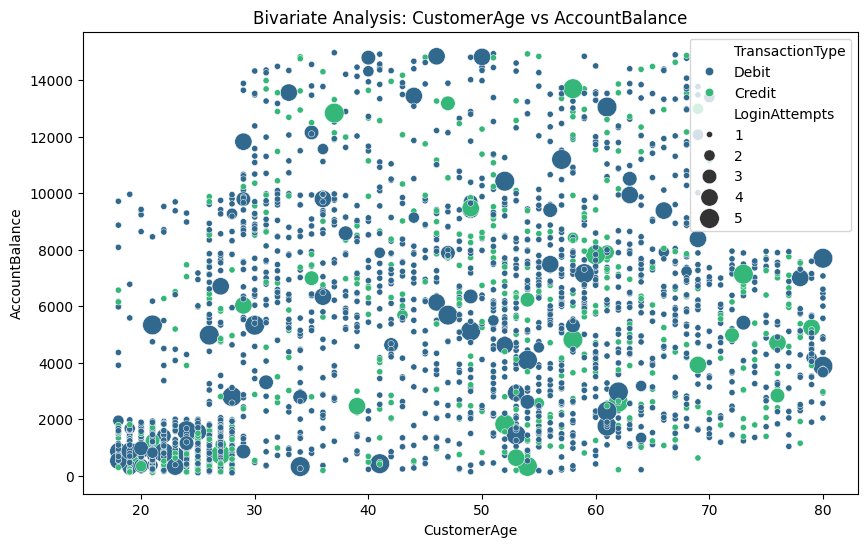

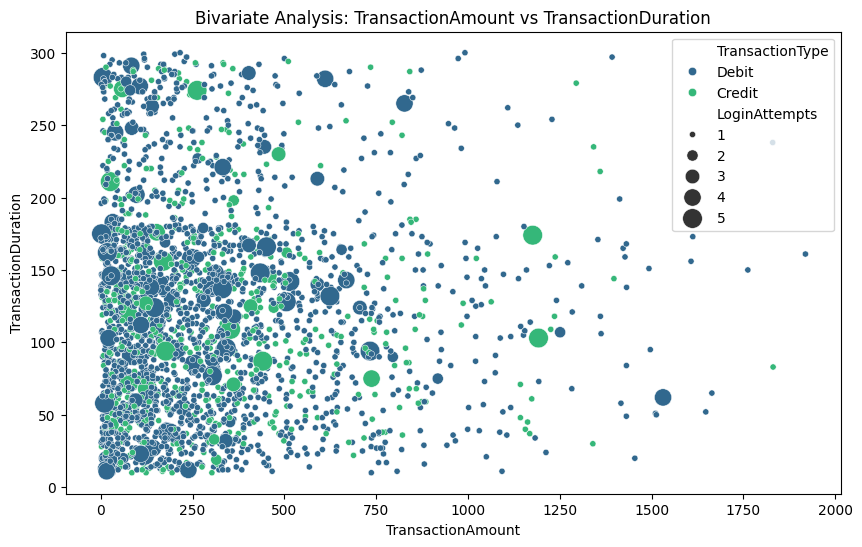

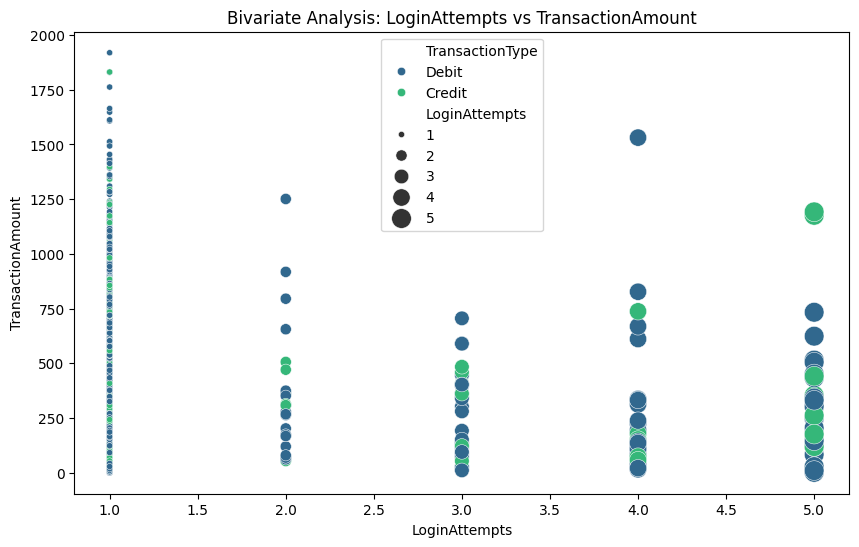

In [26]:
# Set the style for the plot
sns.set_style = ("whitegrid")

# Create a figure and axes
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))

# Plot histograms
sns.histplot(bank_transaction_data['TransactionAmount'], kde=True, ax=axes[0, 0])
axes[0,0].set_title("Distribution of Transaction Amounts")


sns.histplot(bank_transaction_data['CustomerAge'], kde=True, ax=axes[0, 1])
axes[0,1].set_title("Distribution of Customer Ages")

# Boxplot of TransactionDuration
sns.boxplot(x=bank_transaction_data['TransactionDuration'], ax=axes[1, 0])
axes[1,0].set_title("Distribution of Transaction Durations")


# Boxplot of AccountBalance
sns.boxplot(x=bank_transaction_data['AccountBalance'], ax=axes[1,1])
axes[1,1].set_title("Distribution of Account Balances")

# Countplot of transaction type
sns.countplot(x='TransactionType', data=bank_transaction_data, ax=axes[2,0])
axes[2,0].set_title("Count of Transaction Types")

# Countplot of customer occupations
sns.countplot(x='CustomerOccupation', data=bank_transaction_data, ax=axes[2,1])
axes[2,1].set_title("Count of Customer Occupations")


# Adjust layout and show the plot
plt.tight_layout()
plt.show()

# Create the pie charts
fig1 = px.pie(bank_transaction_data, names='TransactionType', title='Transaction Type Distribution')
fig2 = px.pie(bank_transaction_data, names='Channel', title='Transaction Channel Distribution')
fig3 = px.pie(bank_transaction_data, names='CustomerOccupation', title='Customer Occupation Distribution')


# Customize the pie charts for better visualization (optional)
fig1.update_traces(textinfo='percent+label', pull=[0.1, 0]) # Highlight a slice
fig2.update_traces(marker=dict(colors=['skyblue', 'lightgreen', 'orange'])) # Custom colors
fig3.update_layout(title_x=0.5) # Center the title

# Display the charts
fig1.show()
fig2.show()
fig3.show()


# Seaborn Countplot for Customer Occupation
plt.figure()
sns.countplot(x='CustomerOccupation', data=bank_transaction_data)
plt.title('Frequency of Customer Occupations')
plt.xlabel('Customer Occupation')
plt.ylabel('Frequency')

# Plotly bar chart for the top 5 locations
top_locations = bank_transaction_data['Location'].value_counts().head(5)
fig = px.bar(x=top_locations.index, y=top_locations.values, labels={'x':'Location', 'y':'Count'},
             title="Top 5 Locations", color_discrete_sequence=['#FF5733'])
fig.show()


# --- Frequency Polygons ---
plt.figure()
sns.kdeplot(bank_transaction_data['CustomerAge'], color='orange')
plt.title('Frequency Polygon of Customer Age')
plt.xlabel('Customer Age')
plt.ylabel('Density')

plt.show()


# Create a list of column pairs for bivariate analysis
column_pairs = [
    ('TransactionAmount', 'CustomerAge'),
    ('TransactionDuration', 'AccountBalance'),
    ('CustomerAge', 'AccountBalance'),
    ('TransactionAmount', 'TransactionDuration'),
    ('LoginAttempts', 'TransactionAmount')
]

# Function to create and display a plot for a given pair of columns
def create_bivariate_plot(col1, col2):
    plt.figure(figsize=(10, 6))  # Set the figure size
    sns.scatterplot(x=col1, y=col2, data=bank_transaction_data, hue='TransactionType', palette='viridis', size='LoginAttempts', sizes=(20, 200))
    plt.title(f'Bivariate Analysis: {col1} vs {col2}')
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.show()


# Create plots for all column pairs
for col1, col2 in column_pairs:
    create_bivariate_plot(col1, col2)

In [28]:
# Convert 'TransactionDate' to datetime if it's not already
bank_transaction_data['TransactionDate'] = pd.to_datetime(bank_transaction_data['TransactionDate'])

# 1. Daily Transaction Amount
daily_transactions = bank_transaction_data.groupby('TransactionDate')['TransactionAmount'].sum().reset_index()
fig1 = px.line(daily_transactions, x='TransactionDate', y='TransactionAmount', title='Daily Transaction Volume',
              labels={'TransactionDate': 'Date', 'TransactionAmount': 'Total Transaction Amount'},
              color_discrete_sequence=['#1f77b4']) # Use a distinct blue color
fig1.update_traces(line=dict(width=2))  # Adjust line width
fig1.show()

# 2. Transaction Amount by Transaction Type
fig2 = px.line(bank_transaction_data.groupby(['TransactionDate','TransactionType'])['TransactionAmount'].sum().reset_index(),
             x='TransactionDate', y='TransactionAmount', color='TransactionType',
             title='Transaction Amount by Type Over Time',
             labels={'TransactionDate': 'Date', 'TransactionAmount': 'Total Amount'},
             color_discrete_sequence=['#d62728', '#2ca02c']) # Use distinct colors
fig2.update_traces(line=dict(width=2))
fig2.show()


# 3. Transaction Amount by Location (Top 5)
top_locations = bank_transaction_data.groupby('Location')['TransactionAmount'].sum().nlargest(5).index
bank_transaction_data_top_locations = bank_transaction_data[bank_transaction_data['Location'].isin(top_locations)]

fig3 = px.line(bank_transaction_data_top_locations.groupby(['TransactionDate', 'Location'])['TransactionAmount'].sum().reset_index(),
              x='TransactionDate', y='TransactionAmount', color='Location',
              title='Transaction Amount by Location (Top 5)',
               labels={'TransactionDate': 'Date', 'TransactionAmount': 'Total Amount'})
fig3.update_traces(line=dict(width=2))
fig3.show()


# 4. Transaction Count by Day of Week
bank_transaction_data['DayOfWeek'] = bank_transaction_data['TransactionDate'].dt.dayofweek  # 0 is Monday, 6 is Sunday
fig4 = px.histogram(bank_transaction_data, x='DayOfWeek', y='TransactionAmount', histfunc='count', color='TransactionType',
                   title='Transaction Count by Day of the Week',
                   labels={'DayOfWeek': 'Day (0=Mon, 6=Sun)', 'TransactionAmount': 'Transaction Count'})
fig4.show()


# 5.  Moving Average of Transaction Amounts
window_size = 7 #Example: 7-day moving average
daily_transactions['MovingAverage'] = daily_transactions['TransactionAmount'].rolling(window=window_size).mean()

fig5 = go.Figure()
fig5.add_trace(go.Scatter(x=daily_transactions['TransactionDate'], y=daily_transactions['TransactionAmount'],
                         mode='lines', name='Daily Transactions', line=dict(color='#1f77b4', width=2)))
fig5.add_trace(go.Scatter(x=daily_transactions['TransactionDate'], y=daily_transactions['MovingAverage'],
                         mode='lines', name=f'{window_size}-Day Moving Average', line=dict(color='#ff7f0e', width=2)))
fig5.update_layout(title=f'Daily Transactions and {window_size}-Day Moving Average',
                  xaxis_title='Date', yaxis_title='Transaction Amount')
fig5.show()

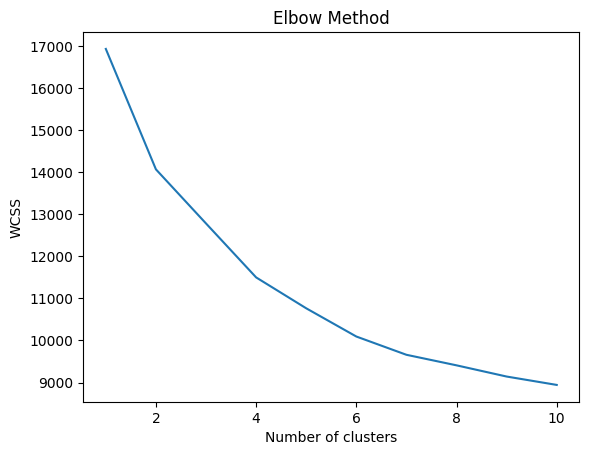

In [29]:
# K Means
data = bank_transaction_data.copy()

# Preprocessing data
categorical_cols = ['TransactionType', 'Location', 'Channel', 'CustomerOccupation']
numerical_cols = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'AccountBalance']

# One-hot encoding
encoder = OneHotEncoder(handle_unknown='ignore')
encoded_features = encoder.fit_transform(data[categorical_cols])
encoded_bank_transaction_data = pd.DataFrame(encoded_features.toarray())

# Scaller
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[numerical_cols])
scaled_bank_transaction_data = pd.DataFrame(scaled_features, columns=numerical_cols)

encoded_bank_transaction_data.columns = encoded_bank_transaction_data.columns.astype(str)


data_processed = pd.concat([encoded_bank_transaction_data, scaled_bank_transaction_data], axis=1)

# K-Means Clustering
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(data_processed)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(data_processed)
data_processed['Cluster'] = y_kmeans

# Labeling fraud
data_processed['Fraud'] = np.where(data_processed['Cluster'] == 2, 1, 0)

# add cluster and fraud to dataframe
data['Cluster'] = y_kmeans
data['Fraud'] = data_processed['Fraud']

# Create the scatter plot
fig = px.scatter(data, x="TransactionAmount", y="AccountBalance", color="Cluster", symbol="Fraud")

# Customize the plot (optional)
fig.update_layout(title="Transaction Amount vs. Account Balance",
                  xaxis_title="Transaction Amount",
                  yaxis_title="Account Balance")

fig.show()

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       351
           1       0.97      0.95      0.96       152

    accuracy                           0.98       503
   macro avg       0.98      0.97      0.97       503
weighted avg       0.98      0.98      0.98       503

[[347   4]
 [  7 145]]


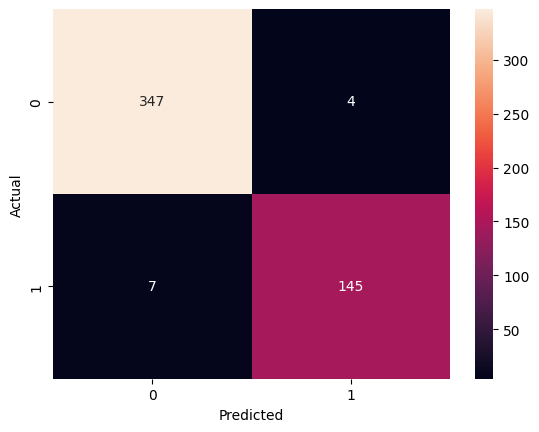

In [30]:
#Random Forrest
# seperated fitur and target
X = data_processed.drop(['Fraud', 'Cluster'], axis=1)
y = data_processed['Fraud']

# create train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create model Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluation model
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Visualization Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()